# Project 2

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim, hist, semilogx, grid, legend, loglog
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from numpy import mean
from scipy import stats
from toolbox_02450 import feature_selector_lr, bmplot, rlr_validate, train_neural_net
from sklearn import model_selection, tree
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import scipy.stats as st

## Loading Data and Visualisation

In [ ]:
column_names = ['ID','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
data = pd.read_csv(r'C:\Users\alexm\OneDrive\MIS DOCUMENTOS\DTU\IMLDM\Project 1\Data\glass.data', names=column_names, sep=',')
data.drop(['ID'], axis = 1, inplace = True)
column_names.pop(0)
print(data)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type_of_glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0              7

[214 rows x 10 columns]


## Regression

### Part A

#### Feature Transformation

The data is transformed to achieve having each column with a mean = 0 and standard deviation = 1.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])  # Exclude the last column "Type_of_glass"

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])

# Append the "Type_of_glass" column to the scaled DataFrame
scaled_df["Type_of_glass"] = data["Type_of_glass"]

# "scaled_df" now contains the scaled data with mean 0 and standard deviation 1 for each column except "Type_of_glass"
print(scaled_df)


           RI        Na        Mg        Al        Si         K        Ca  \
0    0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1   -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2   -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3   -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4   -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
..        ...       ...       ...       ...       ...       ...       ...   
209 -0.704815  0.898681 -1.865511  2.881125 -0.052974 -0.640968  0.157088   
210 -0.500178  1.856097 -1.865511  1.094342  0.529374 -0.763919 -0.392276   
211  0.754046  1.168721 -1.865511  1.154570  0.995252 -0.763919 -0.364103   
212 -0.612399  1.193270 -1.865511  0.993960  1.241133 -0.763919 -0.335931   
213 -0.414363  1.009152 -1.865511  1.275028  0.917606 -0.763919 -0.237327   

           Ba        Fe  Type_of_glass  
0   -0.352877 -0.586451           

In [ ]:
summary_table = pd.DataFrame(columns=["Column Name", "Mean", "Standard Deviation"])

# Calculate and add the mean and standard deviation for each column
for col in scaled_df.columns:
    if col != "Type_of_glass":
        mean_value = scaled_df[col].mean()
        std_value = scaled_df[col].std()
        summary_table = summary_table.append({"Column Name": col, "Mean": mean_value, "Standard Deviation": std_value}, ignore_index=True)

print(summary_table)


  Column Name          Mean  Standard Deviation
0          RI -2.877449e-14            1.002345
1          Na  2.179980e-15            1.002345
2          Mg -2.801497e-16            1.002345
3          Al -3.434428e-16            1.002345
4          Si  9.966067e-16            1.002345
5           K  7.470660e-17            1.002345
6          Ca -3.137418e-16            1.002345
7          Ba -1.763906e-16            1.002345
8          Fe -6.121791e-17            1.002345


#### Cheking tribute to be predicted

The first idea is to predict the variable RI (refractive index) based on the varaibles Ca and Si (calcium oxide and silicone)  by ususing a ordinary least squares linear regression model. But in any case we will prove which attribute amonge those is the most suitable for the regression.

Average MSE of RI: 2.64585861008799e-17
Average MSE of Na: -9.130806183833063e-17


Average MSE of Ca: -7.833816669084049e-17


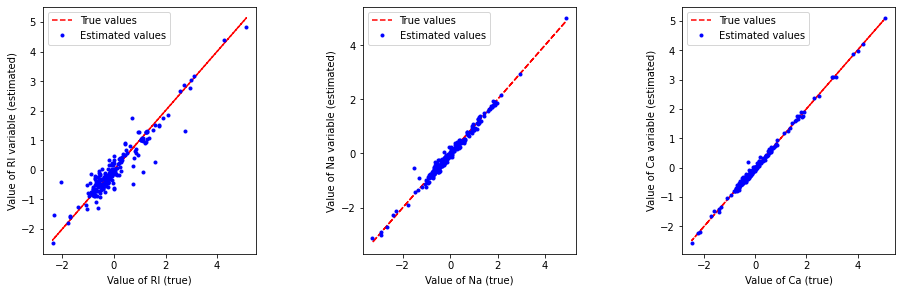

In [ ]:
criterion_variables = ['RI', 'Na', 'Ca']

# Display plot
plt.figure(figsize=(21,10))
plt.subplots_adjust(wspace = 0.5)

for i in range(3):
    attr_col = list(scaled_df.columns).index(criterion_variables[i])
    cols = list(range(0, attr_col)) + list(range(attr_col + 1, len(scaled_df.columns)))

    raw_data=scaled_df.values
    X = raw_data[:, cols]
    y = raw_data[:, attr_col]
    attributeNames = list(scaled_df.columns[cols])

    N, M = X.shape
    
    X = stats.zscore(X);

    #regression model    
    model = lm.LinearRegression()
    model.fit(X,y)

   
    y_est = model.predict(X)
    residual = y_est-y
    print(f'Average MSE of {criterion_variables[i]}: {mean(residual)}')
    
    plt.subplot(2, 4, i+1)
    plt.plot(y, y, '--r')
    plt.plot(y, y_est, '.b')
    plt.xlabel('Value of {0} (true)'.format(criterion_variables[i])); ylabel('Value of {0} variable (estimated)'.format(criterion_variables[i]))
    plt.legend(['True values', 'Estimated values'], loc = 2);


All thre possible estimation attributes seem to align well with the true fit. However, RI is the one that shows the lowest value of MSE residual. Thus, it is decided indeed to continue with the idea of predicting RI based on Ca and Na, and maybe on other attrubutes.

#### Linear Regression to predict RI

##### Linear Regression to predict RI based on CA and Si

Now a computation of of a linear regression to predict RI values based on Ca and Si attributes is computed and plotted. Also a is plotted and computed the distribution of the resudial values for each value aon its frequency.


Linear Regression Formula:
y = -0.0000 + -0.3899 * X1 + 0.7290 * X2 


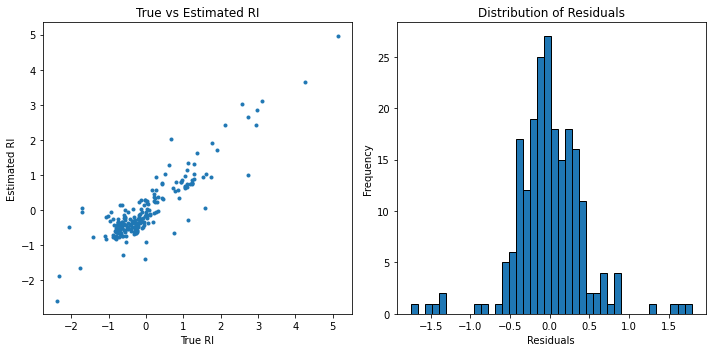

In [ ]:
# Assuming you already have 'data' loaded

# Data Preparation
X = scaled_df[['Si', 'Ca']].values
y = scaled_df['RI'].values

# Linear Regression Model
model = lm.LinearRegression(fit_intercept=True)
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the formula
print("Linear Regression Formula:")
print(f"y = {intercept:.4f} ", end="")
for i, coef in enumerate(coefficients):
    print(f"+ {coef:.4f} * X{i+1} ", end="")
print()

# Prediction and Residual Calculation
y_est = model.predict(X)
residual = y_est - y

# Scatter Plot of True vs Estimated 'RI'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, y_est, marker='.')
plt.xlabel('True RI')
plt.ylabel('Estimated RI')
plt.title('True vs Estimated RI')

# Histogram of Residuals
plt.subplot(1, 2, 2)
plt.hist(residual, bins=40, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

##### Linear Regression to predict RI based on all other attrubutes

It is checked also if a better performance is got if using all attributes to predict RI insted of using Ca and Si as it was decided in the first assignment.

Linear Regression Formula:
y = -0.0000 + 0.0430 * X1 + 1.4606 * X2 + 0.3752 * X3 + 0.8759 * X4 + 0.0054 * X5 + 0.2970 * X6 + 0.4884 * X7 + 0.0137 * X8 


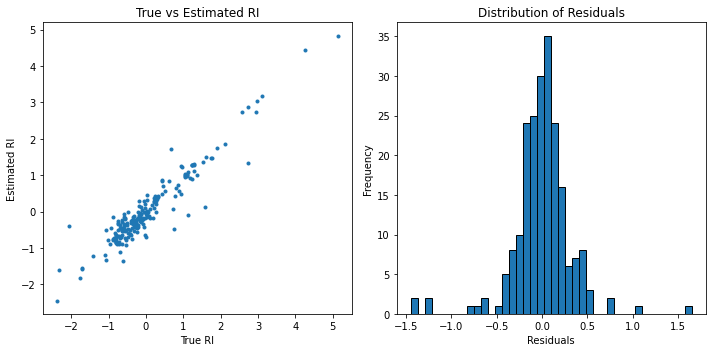

In [ ]:
# Assuming you already have 'data' loaded

# Data Preparation
X = scaled_df[['Si', 'Ca', 'Na', 'Mg', 'Al', 'K', 'Ba', 'Fe']].values
y = scaled_df['RI'].values

# Linear Regression Model
model = lm.LinearRegression(fit_intercept=True)
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the formula
print("Linear Regression Formula:")
print(f"y = {intercept:.4f} ", end="")
for i, coef in enumerate(coefficients):
    print(f"+ {coef:.4f} * X{i+1} ", end="")
print()

# Prediction and Residual Calculation
y_est = model.predict(X)
residual = y_est - y

# Scatter Plot of True vs Estimated 'RI'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, y_est, marker='.')
plt.xlabel('True RI')
plt.ylabel('Estimated RI')
plt.title('True vs Estimated RI')

# Histogram of Residuals
plt.subplot(1, 2, 2)
plt.hist(residual, bins=40, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

It is seen that a better resukt is get by using all attributes rather taht just using Ca and Si as it was thought at the beginning, then it is decided to continue with this model.

#### Regularisation

Now the regularisation parameter $\lambda$ is introduced in the linear regression.
To properly estimate the generalisation error for different values of $\lambda$, a two-level cross-validation testing is performed with both the outer and inner layer having K=10 folds.


In [ ]:
raw_data = scaled_df.to_numpy()
attr_col = list(scaled_df.columns).index('RI')
cols = list(range(0, attr_col)) + list(range(attr_col + 1, len(scaled_df.columns)))

X = raw_data[:, cols]
y = raw_data[:, attr_col] # the 'adiposity' column
attributeNames = list(scaled_df.columns[cols])
attributeNames.remove('Type_of_glass')
print(attributeNames)
N, M = X.shape

['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


In [ ]:
# Add offset attribute
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames= [u'Offset']+attributeNames
M = M+1
print(attributeNames)

['Offset', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


<Figure size 432x288 with 0 Axes>

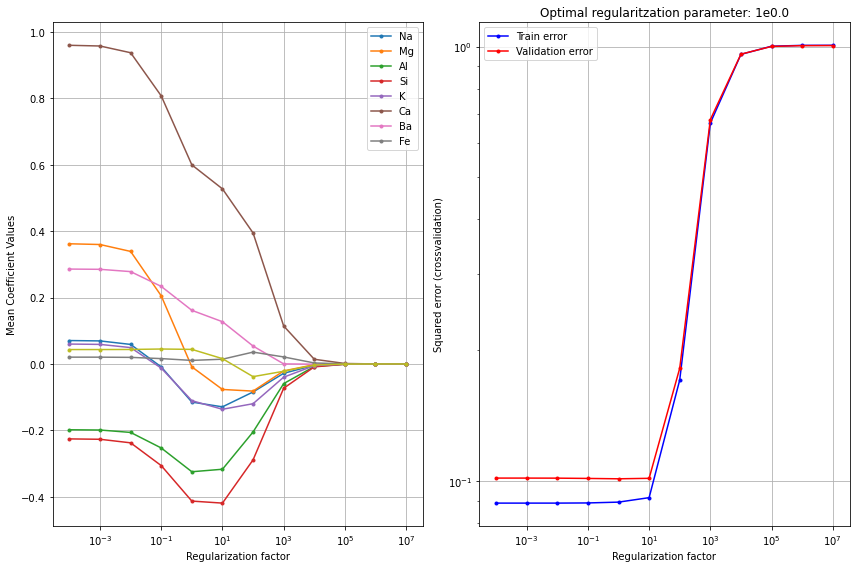

Linear regression without feature selection:
- Training error: 0.1036475000975821
- Test error:     0.12349490343852279
- R^2 train:     0.8962666435614168
- R^2 test:     0.8674538684939467

Regularized linear regression:
- Training error: 0.10376967734397255
- Test error:     0.1254814852420882
- R^2 train:     0.8961443651095818
- R^2 test:     0.8653216854997392

Weights in last fold:
         Offset            0.04
             Na           -0.11
             Mg            -0.0
             Al           -0.32
             Si           -0.41
              K           -0.11
             Ca            0.61
             Ba            0.16
             Fe            0.01
Generalization error for different values of lambda:
              0.0001                 0.12
               0.001                 0.12
                0.01                 0.12
                 0.1                 0.12
                 1.0                 0.12
                10.0                 0.13
               

In [ ]:
K = 10 #fold for each layer
CV = model_selection.KFold(K, shuffle=True)


# Values of lambda
lambdas = np.power(10.,range(-4,8))

# Initialise variables
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
val_error_lambdas = np.empty((K,len(lambdas)))
w_rlr = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0
for train_index, test_index in CV.split(X,y):
    
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10    
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    val_error_lambdas[k] = test_err_vs_lambda
    
    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions)
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)
    
    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 
    
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train
    
    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
 

    # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k, figsize=(12,8))
        subplot(1,2,1)
        semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
        xlabel('Regularization factor')
        ylabel('Mean Coefficient Values')
        grid()
        # plot, since there are many attributes
        legend(attributeNames[1:], loc='best')
        
        subplot(1,2,2)
        title('Optimal regularitzation parameter: 1e{0}'.format(np.log10(opt_lambda)))
        loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r.-')
        xlabel('Regularization factor')
        ylabel('Squared error (crossvalidation)')
        legend(['Train error','Validation error'])
        grid()
    

    k+=1
    plt.tight_layout()
    
show()

# Display results
print('Linear regression without feature selection:')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Regularized linear regression:')
print('- Training error: {0}'.format(Error_train_rlr.mean()))
print('- Test error:     {0}'.format(Error_test_rlr.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_rlr.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test_rlr.sum())/Error_test_nofeatures.sum()))

print('Weights in last fold:')
for m in range(M-1):
    print('{:>15} {:>15}'.format(attributeNames[m], np.round(w_rlr[m,-1],2)))

print('Generalization error for different values of lambda:')
for i in range(len(lambdas)):
    print('{:>20} {:>20}'.format(float(lambdas[i]), str(np.round(val_error_lambdas.mean(axis = 0)[i],2))))

The results obtained show that Ca obtainan the biggest weight in the last fold and Si much lower weight as expected. It is seen a typical trend of the generalisation error falling and then growing as λ increases. The obptimal regulrazitatio parameter is found with $\lambda = 1e-2$, that corresponds to the one with the lower error. This means that setting $\lambda$ to this parametre it is reached the best trade-off between bias and variance. If a higher value is set, the bias'd be higher and the variance smaller; and the other way around it the $\lambda$ were smaller.

#### Regularised linear equation

The equation for the regularised linear equation is found and then compared the wright for each attribute with the non realularised equation.

In [ ]:
ridgereg_model = Ridge(alpha = 10, fit_intercept = True).fit(X, y)
linreg_model = LinearRegression(fit_intercept = True).fit(X, y)
    
print('Weights for LR model with regularization:')
print('{:>20} {:>20}'.format('Offset', str(np.round(ridgereg_model.intercept_,2))))
for m in range(M-1):
    print('{:>20} {:>20}'.format(attributeNames[m], str(np.round(ridgereg_model.coef_[m],2))))
    
print()
print()

print('Weights for LR model without regularization:')
print('{:>20} {:>20}'.format('Offset', str(np.round(linreg_model.intercept_,2))))
for m in range(M-1):
    print('{:>20} {:>20}'.format(attributeNames[m], str(np.round(linreg_model.coef_[m],2))))

Weights for LR model with regularization:
              Offset                -0.04
              Offset                  0.0
                  Na                -0.13
                  Mg                -0.03
                  Al                 -0.3
                  Si                -0.44
                   K                -0.12
                  Ca                 0.55
                  Ba                 0.16
                  Fe                 -0.0


Weights for LR model without regularization:
              Offset                -0.07
              Offset                  0.0
                  Na                 0.35
                  Mg                 0.88
                  Al                -0.01
                  Si                 0.03
                   K                 0.29
                  Ca                 1.44
                  Ba                 0.48
                  Fe                 0.02


Then it is possibl to conclude that a glass high values og Ca and Ba and low values of Si, Al, Na have a highest value of RI:

### Part B

In this section will be compared the performance of three models:
   - Regularized linear regression RLR
   - Artificial neural network ANN
   - Baseline BL

#### Comparison of methods and Table genration

working new

In [ ]:
def train_neural_net(model, loss_fn, X, y, n_replicates, max_iter):
    # Implement your training logic here
    pass

# Initialize variables
K1 = 10  # for model selection
K2 = 10  # for optimal parameter selection

ann_test_error_k1 = np.zeros(K1)
linreg_test_error_k1 = np.zeros(K1)
baseline_test_error_k1 = np.zeros(K1)

# Create a table to store the results
columns = ['Iteration', 'Optimal Hidden Units', 'Optimal Lambda', 'ANN Test Error', 'LinReg Test Error', 'Baseline Test Error']
results_table = np.zeros((K1, len(columns)))

# K-fold crossvalidation
CV1 = KFold(n_splits=K1, shuffle=True)

k1 = 0
for par_index, test_index in CV1.split(X):
    print('Computing CV1 fold: {0}/{1}...'.format(k1 + 1, K1))

    # extract training and test set for the current CV fold
    X_par, y_par = X[par_index, :], y[par_index]
    X_test, y_test = X[test_index, :], y[test_index]

    CV2 = KFold(n_splits=K2, shuffle=False)

    # ANN Regression
    h_unit_interval = np.arange(1, 3, 1)  # number of hidden units in the single hidden layer
    nr_of_nn_replicates = 1  # when finding loss, take the best neural network from n replicates (to deal with local minima issues)
    max_iter = 10000  # max nr. of epochs (if convergence is not yet reached)

    ann_gen_error_rate_s = np.zeros(len(h_unit_interval))

    for s in range(0, len(h_unit_interval)):
        k2 = 0
        ann_val_error_rate = np.zeros(K2)

        # Use your train_neural_net function here
        # ...

        ann_gen_error_rate_s[s] = np.sum(ann_val_error_rate) / len(ann_val_error_rate)

    ann_min_error = np.min(ann_gen_error_rate_s)
    opt_nr_h_units_index = np.argmin(ann_gen_error_rate_s)
    opt_nr_h_units = h_unit_interval[opt_nr_h_units_index]

    ann_model = lambda X: np.tanh(np.dot(X, np.random.randn(X.shape[1], h_unit_interval[opt_nr_h_units_index]))) @ np.random.randn(h_unit_interval[opt_nr_h_units_index], 1)
    
    best_trained_neural_net = ann_model(X_par)  # Initialize the model
    # Use your train_neural_net function here
    # ...

    ann_y_test_estimated = ann_model(X_test)
    ann_test_error_k1[k1] = np.square(y_test - ann_y_test_estimated.flatten()).sum() / len(y_test)

    # Regularized Linear Regression
    lambda_interval = np.power(10., range(-5, 9))
    linreg_gen_error_rate_s = np.zeros(len(lambda_interval))

    for s in range(0, len(lambda_interval)):
        k2 = 0
        linreg_val_error_rate = np.zeros(K2)

        for train_index, val_index in CV2.split(X_par):
            # extract training and test set for the current CV fold
            X_train, y_train = X_par[train_index, :], y_par[train_index]
            X_val, y_val = X_par[val_index, :], y_par[val_index]

            linreg_model = Ridge(alpha=lambda_interval[s], fit_intercept=True)
            linreg_model = linreg_model.fit(X_train, y_train)

            linreg_y_val_estimated = linreg_model.predict(X_val).T
            linreg_val_error_rate[k2] = np.square(y_val - linreg_y_val_estimated).sum() / len(y_val)
            k2 = k2 + 1

        linreg_gen_error_rate_s[s] = np.sum(linreg_val_error_rate) / len(linreg_val_error_rate)

    linreg_min_error = np.min(linreg_gen_error_rate_s)
    opt_lambda_index = np.argmin(linreg_gen_error_rate_s)
    opt_lambda = lambda_interval[opt_lambda_index]

    linreg_model = Ridge(alpha=lambda_interval[opt_lambda_index], fit_intercept=True)
    linreg_model = linreg_model.fit(X_par, y_par)

    linreg_y_test_estimated = linreg_model.predict(X_test).T
    linreg_test_error_k1[k1] = np.square(y_test - linreg_y_test_estimated).sum() / len(y_test)

    # Baseline - LinearRegression
    baseline_test_error_k1[k1] = np.square(y_test - y_par.mean()).sum() / len(y_test)

    # Store the results in the table
    results_table[k1, :] = [k1 + 1, opt_nr_h_units, opt_lambda, ann_test_error_k1[k1], linreg_test_error_k1[k1], baseline_test_error_k1[k1]]

    print('ANN error rate: {0}'.format(np.round(ann_test_error_k1[k1], decimals=2)))
    print('Optimal number of hidden units: {0}'.format(opt_nr_h_units))
    print('Regularized linear regression error rate: {0}'.format(np.round(linreg_test_error_k1[k1], decimals=2)))
    print('Optimal lambda: {0}'.format(opt_lambda))
    print('Baseline error rate: {0}'.format(np.round(baseline_test_error_k1[k1], decimals=2)))
    print()
    print()

    k1 = k1 + 1

# Print the results table
print("\nResults Table:")
print("{:<15} {:<25} {:<15} {:<20} {:<20} {:<20}".format(*columns))
for row in results_table:
    print("{:<15} {:<25} {:<15} {:<20} {:<20} {:<20}".format(*row))


Computing CV1 fold: 1/10...
ANN error rate: 6.68
Optimal number of hidden units: 1
Regularized linear regression error rate: 0.27
Optimal lambda: 1e-05
Baseline error rate: 1.5


Computing CV1 fold: 2/10...
ANN error rate: 1.71
Optimal number of hidden units: 1
Regularized linear regression error rate: 0.3
Optimal lambda: 10.0
Baseline error rate: 1.92


Computing CV1 fold: 3/10...
ANN error rate: 1.22
Optimal number of hidden units: 1
Regularized linear regression error rate: 0.03
Optimal lambda: 0.1
Baseline error rate: 1.43


Computing CV1 fold: 4/10...
ANN error rate: 0.79
Optimal number of hidden units: 1
Regularized linear regression error rate: 0.08
Optimal lambda: 0.01
Baseline error rate: 0.4


Computing CV1 fold: 5/10...
ANN error rate: 2.69
Optimal number of hidden units: 1
Regularized linear regression error rate: 0.1
Optimal lambda: 1e-05
Baseline error rate: 0.81


Computing CV1 fold: 6/10...
ANN error rate: 2.21
Optimal number of hidden units: 1
Regularized linear regres

#### Statistical evaluation

The Setup 1 is selected to be the method to evaluate if there is a a significant perfromance difference between three models used. This setup is caracterised by the treaining set being fixed. Alpha is set to be 0.05. 


In [ ]:
print(ann_test_error_k1)
print(linreg_test_error_k1)
print(baseline_test_error_k1)

[6.68329606 1.70910447 1.21563689 0.78528421 2.68769441 2.21415483
 2.9183962  1.93616059 0.38273947 1.54982543]
[0.26609505 0.29661288 0.02705304 0.08323243 0.09862143 0.03639713
 0.0534368  0.1753759  0.05988956 0.11258705]
[1.50355043 1.91553192 1.42728772 0.40019304 0.80530459 0.939043
 0.54126269 1.22332943 0.56249565 0.69198859]


In [ ]:
alpha = 0.05


# ANN vs. regularized linear regression 
z1 = (ann_test_error_k1 - linreg_test_error_k1)
CI1 = st.t.interval(1-alpha, len(z1)-1, loc=np.mean(z1), scale=st.sem(z1))  # Confidence interval
p1 = 2*st.t.cdf(-np.abs( np.mean(z1) )/st.sem(z1), df=len(z1)-1)  # p-value
print('ANN vs. regularized linear regression')
print('Confidence interval:', CI1)
print('p-value:', p1)
print()

# ANN vs. baseline
z2 = (ann_test_error_k1 - baseline_test_error_k1)
CI2 = st.t.interval(1-alpha, len(z2)-1, loc=np.mean(z2), scale=st.sem(z2))  # Confidence interval
p2 = 2*st.t.cdf(-np.abs( np.mean(z2) )/st.sem(z2), df=len(z2)-1)  # p-value
print('ANN vs. baseline')
print('Confidence interval:', CI2)
print('p-value:', p2)
print()

# regularized linear regression vs. baseline
z3 = (linreg_test_error_k1 - baseline_test_error_k1)
CI3 = st.t.interval(1-alpha, len(z3)-1, loc=np.mean(z3), scale=st.sem(z3))  # Confidence interval
p3 = 2*st.t.cdf( -np.abs( np.mean(z3) )/st.sem(z3), df=len(z3)-1)  # p-value
print('Regularized linear regression vs. baseline')
print('Confidence interval:', CI3)
print('p-value:', p3)
print()

# Generalized error rates
gen_error_regularized_linreg = np.sum(linreg_test_error_k1) / len(linreg_test_error_k1)
gen_error_ann = np.sum(ann_test_error_k1) / len(ann_test_error_k1)
gen_error_baseline_linreg = np.sum(baseline_test_error_k1) / len(baseline_test_error_k1)

print('ANN generalized error rate: {0}'.format(np.round(gen_error_ann, decimals = 2)))
print('Regularized linear regression generalized error rate: {0}'.format(np.round(gen_error_regularized_linreg, decimals = 2)))
print('Baseline generalized error rate: {0}'.format(np.round(gen_error_baseline_linreg, decimals = 2)))

ANN vs. regularized linear regression
Confidence interval: (0.8612460763969485, 3.313352178841985)
p-value: 0.00389904210443509

ANN vs. baseline
Confidence interval: (0.024838842177138387, 2.3896222565750618)
p-value: 0.046260803540387696

Regularized linear regression vs. baseline
Confidence interval: (-1.1915916312574, -0.5685455252293344)
p-value: 0.00012664875536552044

ANN generalized error rate: 2.21
Regularized linear regression generalized error rate: 0.12
Baseline generalized error rate: 1.0


## CLASSIFICATION

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector


column_names = ['ID','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Target']
data = pd.read_csv('G:\VScodeProjects\GlassType\Data\glass.data', names=column_names, sep=',')
data.drop(['ID'], axis = 1, inplace = True)
column_names.pop(0)
print(data)

#All features are Continous and Ratio, target is obviously categorical

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Target
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0       1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0       1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0       1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0       1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0       1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...     ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0       7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0       7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0       7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0       7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0       7

[214 rows x 10 columns]


In [35]:
data_without_target = data.drop(['Target'], axis = 1)
labels = data['Target']

# Sample dataset and corresponding labels
data_without_target = preprocessing.scale(data_without_target)
data_without_target = pd.DataFrame(data_without_target)
X, y = data_without_target, labels

# Define a list of candidate K values to be tested
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Initialize a list to store the results
results_knn = []
count = 0

# First-level cross-validation: Split the data into training and testing sets
kf_outer = KFold(n_splits=10, shuffle=True, random_state=42)

for train_idx, test_idx in kf_outer.split(X):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    count += 1
    result_temp_knn = []

    # Second-level cross-validation: Cross-validate the KNN model for each K
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)

        result_temp_knn1 = []

        # Inner cross-validation
        kf_inner = KFold(n_splits=10, shuffle=True, random_state=42)
        X_train.reset_index(drop=True, inplace=True)
        y_train.reset_index(drop=True, inplace=True)
        for train_idx1, test_idx1 in kf_inner.split(X_train):
            X_train1, X_test1 = X_train.loc[train_idx1], X_train.loc[test_idx1]
            y_train1, y_test1 = y_train.loc[train_idx1], y_train.loc[test_idx1]

            # make predictions KNN
            knn.fit(X_train1, y_train1)
            y_hat_knn = knn.predict(X_test1)
            
            # Calculate the error KNN
            error_KNN = 1 - accuracy_score(y_test1, y_hat_knn)
            result_temp_knn1.append(error_KNN)



        result_temp_knn.append((k,np.mean(result_temp_knn1)))

    minVal = np.Infinity
    minK = 0
    for tup in result_temp_knn:
        if tup[1] < minVal:
            minVal = tup[1]
            minK = tup[0]
    results_knn.append((count,minK,minVal))

print(results_knn)


[(1, 3, 0.3481578947368421), (2, 3, 0.25394736842105264), (3, 3, 0.3215789473684211), (4, 11, 0.3328947368421053), (5, 3, 0.31), (6, 11, 0.3310526315789474), (7, 3, 0.34184210526315795), (8, 3, 0.32), (9, 3, 0.31605263157894736), (10, 3, 0.2894736842105263)]


In [36]:
data_without_target = data.drop(['Target'], axis = 1)
labels = data['Target']

# Sample dataset and corresponding labels
data_without_target = preprocessing.scale(data_without_target)
data_without_target = pd.DataFrame(data_without_target)
X, y = data_without_target, labels

# Define a list of candidate C values to be tested
C_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

# Initialize a list to store the results
results_logres = []
count = 0

# First-level cross-validation: Split the data into training and testing sets
kf_outer = KFold(n_splits=10, shuffle=True, random_state=42)

for train_idx, test_idx in kf_outer.split(X):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    count += 1
    result_temp_logres = []

    # Second-level cross-validation: Cross-validate the KNN model for each C
    for k in C_values:
        logRes = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=k, max_iter=1000)

        result_temp_logres1 = []

        # Inner cross-validation
        kf_inner = KFold(n_splits=10, shuffle=True, random_state=42)
        X_train.reset_index(drop=True, inplace=True)
        y_train.reset_index(drop=True, inplace=True)
        for train_idx1, test_idx1 in kf_inner.split(X_train):
            X_train1, X_test1 = X_train.loc[train_idx1], X_train.loc[test_idx1]
            y_train1, y_test1 = y_train.loc[train_idx1], y_train.loc[test_idx1]

            # make predictions logres
            logRes.fit(X_train1, y_train1)
            y_hat_logres = logRes.predict(X_test1)
            
            # Calculate the error logres
            error_logres = 1 - accuracy_score(y_test1, y_hat_logres)
            result_temp_logres1.append(error_logres)



        result_temp_logres.append((k,np.mean(result_temp_logres1)))

    minVal = np.Infinity
    minK = 0
    for tup in result_temp_logres:
        if tup[1] < minVal:
            minVal = tup[1]
            minK = tup[0]
    results_logres.append((count,minK,minVal))

print(results_logres)



[(1, 1000, 0.3692105263157895), (2, 1.0, 0.36921052631578954), (3, 100, 0.3168421052631579), (4, 10, 0.3378947368421053), (5, 1000, 0.36263157894736847), (6, 1.0, 0.35578947368421054), (7, 1.0, 0.38763157894736844), (8, 10, 0.3931578947368421), (9, 10, 0.36815789473684213), (10, 10, 0.35263157894736846)]


In [37]:
data_without_target = data.drop(['Target'], axis = 1)
labels = data['Target']

# Sample dataset and corresponding labels
data_without_target = preprocessing.scale(data_without_target)
data_without_target = pd.DataFrame(data_without_target)
X, y = data_without_target, labels

# Define a list of candidate K values to be tested
basline_values = [1]

# Initialize a list to store the results
results_baseline = []
count = 0

# First-level cross-validation: Split the data into training and testing sets
kf_outer = KFold(n_splits=10, shuffle=True, random_state=42)

for train_idx, test_idx in kf_outer.split(X):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    count += 1
    result_temp_baseline = []

    # make predictions baseline
    # Use Counter to count the occurrences of each class
    class_counts = Counter(list(y_train))

    # Find the majority class
    majority_class, _ = class_counts.most_common(1)[0]

    # Second-level cross-validation: Cross-validate the KNN model for each K
    for k in basline_values:

        result_temp_baseline1 = []

        # Inner cross-validation
        kf_inner = KFold(n_splits=10, shuffle=True, random_state=42)
        X_train.reset_index(drop=True, inplace=True)
        y_train.reset_index(drop=True, inplace=True)
        for train_idx1, test_idx1 in kf_inner.split(X_train):
            X_train1, X_test1 = X_train.loc[train_idx1], X_train.loc[test_idx1]
            y_train1, y_test1 = y_train.loc[train_idx1], y_train.loc[test_idx1]


            
            
            y_hat_baseline = np.full(
                shape=len(y_test1),
                fill_value=majority_class
                )
            
            # Calculate the error baseline
            error_baseline = 1 - accuracy_score(y_test1, y_hat_baseline)
            result_temp_baseline1.append(error_baseline)



        result_temp_baseline.append((k,np.mean(result_temp_baseline1)))

    minVal = np.Infinity
    minK = 0
    for tup in result_temp_baseline:
        if tup[1] < minVal:
            minVal = tup[1]
            minK = tup[0]
    results_baseline.append((count,minK,minVal))

print(results_baseline)

[(1, 1, 0.6463157894736842), (2, 1, 0.6410526315789473), (3, 1, 0.651578947368421), (4, 1, 0.656842105263158), (5, 1, 0.6473684210526317), (6, 1, 0.6368421052631579), (7, 1, 0.6368421052631581), (8, 1, 0.6473684210526317), (9, 1, 0.6210526315789473), (10, 1, 0.6581578947368422)]


In [39]:
generalization_error_knn = []
generalization_error_logres = []
generalization_error_baseline = []

for tup in results_knn:
    generalization_error_knn.append(tup[2])

for tup in results_logres:
    generalization_error_logres.append(tup[2])

for tup in results_baseline:
    generalization_error_baseline.append(tup[2])

In [69]:
# Statistical eval

def correlated_ttest(label, errors_a, errors_b, rho, alpha=0.05):
    r = np.subtract(errors_a, errors_b)
    rhat = np.mean(r)
    shat = np.std(r)
    num_of_folds = len(r)
    sigmatilde = shat*np.sqrt(1/num_of_folds+rho/(1-rho))

    CI = st.t.interval(1-alpha, df=num_of_folds-1, loc=rhat, scale=sigmatilde)
    p = 2*st.t.cdf(-np.abs(rhat)/sigmatilde, df=num_of_folds-1)
    
    print(f"Comparison: {label}")
    print("Confidence Interval:", CI)
    print("p-value:", p)
    print("\n")

rho = 1/10 # 10 - number of outer folds
alpha = 0.05

# KNN vs Logistic regression
correlated_ttest("KNN vs. Regression", generalization_error_knn, generalization_error_logres, rho, alpha=alpha)

# KNN vs Baseline
correlated_ttest("KNN vs. Baseline", generalization_error_knn, generalization_error_baseline, rho, alpha=alpha)

# Logistic Regression vs Baseline
correlated_ttest("Regression vs. Baseline", generalization_error_logres, generalization_error_baseline, rho, alpha=alpha)

Comparison: KNN vs. Regression
Confidence Interval: (-0.07964126707285277, -0.00999031187451569)
p-value: 0.017280355888798307


Comparison: KNN vs. Baseline
Confidence Interval: (-0.3577122794947354, -0.2979719310315805)
p-value: 1.3383489735677584e-09


Comparison: Regression vs. Baseline
Confidence Interval: (-0.31152774524500243, -0.25452488633394493)
p-value: 3.2517164738931717e-09




214 214
43
Accuracy: 0.7209
Precision: 0.6910
Recall: 0.7209
F1 Score: 0.6933


c:\Users\kubus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


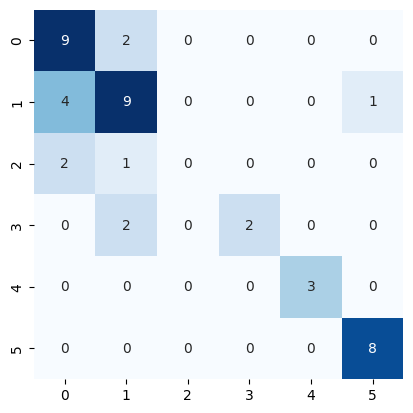

In [58]:
data_without_target = preprocessing.scale(data_without_target)
data_without_target = pd.DataFrame(data_without_target)
X, y = data_without_target, labels


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=10, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


# Get feature weights
feature_weights = model.coef_

print(pd.DataFrame(feature_weights).values.tolist())
